In [1]:
from pathlib import Path
import seaborn as sns
import os
import pandas as pd

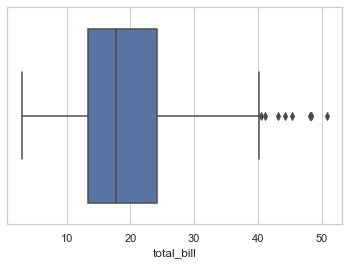

In [2]:
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=tips["total_bill"])

In [3]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [4]:
class LogRecord:
    TRACE_NAME_IND = 0
    GM_COUNT_IND = 1
    LM_COUNT_IND = 2
    PARTITION_SIZE_IND = 3
    INTERNAL_INCONSISTENCY_COUNT_IND = 16
    EXTERNAL_INCONSISTENCY_COUNT_IND = 17
    INTERNAL_MATCHING_LOGIC_OPERATION_COUNT_IND = 12
    EXTERNAL_MATCHING_LOGIC_OPERATION_COUNT_IND = 13
    SUCCESS_PERCENT_IND = 30
    AVG_WORKERS_SEARCHED_PER_TASK_COUNT_IND = 31

    LAST_TERM_IND = -1
    
    def __init__(self, file_data):
        self.file_data = file_data.split('\n')
        print(self.file_data)

    def __extract_int(self, line_index, term_index):
        print(self.file_data[line_index])
        return int(self.file_data[line_index].strip().split()[term_index])
    
    def __extract_float(self, line_index, term_index):
        print(self.file_data[line_index])
        return float(self.file_data[line_index].strip().split()[term_index])
    
    def __extract_str(self, line_index, term_index):
        print(self.file_data[line_index])
        return str(self.file_data[line_index].strip().split()[term_index])
    
    def __extract_success_percent(self, line_index, term_index):
        return float(self.file_data[line_index].strip().split()[term_index].split('=')[-1].rstrip('%'))
    
    def get_gm_count(self):
        return self.__extract_int(LogRecord.GM_COUNT_IND, self.LAST_TERM_IND)

    def get_lm_count(self):
        return self.__extract_int(LogRecord.LM_COUNT_IND, self.LAST_TERM_IND)

    def get_partition_size(self):
        return self.__extract_int(LogRecord.PARTITION_SIZE_IND, self.LAST_TERM_IND)
 
    def get_cluster_size(self):
        return self.get_gm_count() * self.get_lm_count() * self.get_partition_size()

    def get_internal_matching_logic_operation_count(self):
        return self.__extract_int(LogRecord.INTERNAL_MATCHING_LOGIC_OPERATION_COUNT_IND, self.LAST_TERM_IND)
    
    def get_external_matching_logic_operation_count(self):
        return self.__extract_int(LogRecord.EXTERNAL_MATCHING_LOGIC_OPERATION_COUNT_IND, self.LAST_TERM_IND)

    def get_avg_workers_searched_per_task_count(self):
        return self.__extract_float(LogRecord.AVG_WORKERS_SEARCHED_PER_TASK_COUNT_IND, self.LAST_TERM_IND)

    def get_trace_file_name(self):
        return self.__extract_str(LogRecord.TRACE_NAME_IND, self.LAST_TERM_IND)

    def get_success_percent(self):
        return self.__extract_success_percent(LogRecord.SUCCESS_PERCENT_IND, LogRecord.LAST_TERM_IND)
    
    def get_internal_inconsistency_count(self):
        return self.__extract_int(LogRecord.INTERNAL_INCONSISTENCY_COUNT_IND, LogRecord.LAST_TERM_IND)
    
    def get_external_inconsistency_count(self):
        return self.__extract_int(LogRecord.EXTERNAL_INCONSISTENCY_COUNT_IND, LogRecord.LAST_TERM_IND)

In [5]:
MATCHING_LOGIC_TECHNIQUES = ['Original',
                             'Separation',
                             'Ordering_L_M',
                             'Ordering_M_L',
                             'Ordering_L_L',
                             'Ordering_M_M']

# Cluster Size
TEN_THOUSAND_NODE_CLUSTER_SIZE = 10000
THOUSAND_NODE_CLUSTER_SIZE = 1000

CLUSTER_TRACE_NAMES = {'YH1_sub', 'YH2_sub'}

BASE_FILE_PATH = Path("./inconsistency_count")

INTERNAL_INCONSISTENCY_FILE_EXTENSION = "_ini.txt"
EXTERNAL_INCONSISTENCY_FILE_EXTENSION = "_exi.txt"
LOG_FILE_EXTENSION = ".log"

BASE_FILE_PATH

PosixPath('inconsistency_count')

In [6]:
MATCHING_LOGIC_DATA = dict()

MAIN_STATISTICS = 0
INTERNAL_INCONSISTENCY_COUNT = 1
EXTERNAL_INCONSISTENCY_COUNT = 2
COMBINED_INCONSISTENCY_COUNT = 3

for logic in MATCHING_LOGIC_TECHNIQUES:
    MATCHING_LOGIC_DATA[logic] = dict()
    for trace in CLUSTER_TRACE_NAMES:
        MATCHING_LOGIC_DATA[logic][trace] = dict()
        for cluster_size in [TEN_THOUSAND_NODE_CLUSTER_SIZE, THOUSAND_NODE_CLUSTER_SIZE]:
            MATCHING_LOGIC_DATA[logic][trace][cluster_size] = dict()
            MATCHING_LOGIC_DATA[logic][trace][cluster_size][COMBINED_INCONSISTENCY_COUNT] = dict()
        

In [7]:
isLogFile = lambda x : x.endswith(LOG_FILE_EXTENSION)
isInternalInconsistencyFile = lambda x : x.endswith(INTERNAL_INCONSISTENCY_FILE_EXTENSION)
isExternalInconsistencyFile = lambda x : x.endswith(EXTERNAL_INCONSISTENCY_FILE_EXTENSION)

In [8]:
for logic in MATCHING_LOGIC_TECHNIQUES:
    FILES_IN_MATCHING_LOGIC_FOLDER = os.listdir(BASE_FILE_PATH / Path(logic))
    LOG_FILE_LIST = filter(isLogFile, FILES_IN_MATCHING_LOGIC_FOLDER)
    for log_file in LOG_FILE_LIST:
        LOG_FILE_NAME_WITHOUT_EXTENSION = log_file.split('.')[0]
        INTERNAL_INCONSISTENCY_FILE = [x
                                       for x in FILES_IN_MATCHING_LOGIC_FOLDER
                                           if isInternalInconsistencyFile(x) and
                                              x.startswith(LOG_FILE_NAME_WITHOUT_EXTENSION)]
        EXTERNAL_INCONSISTENCY_FILE = [x
                                       for x in FILES_IN_MATCHING_LOGIC_FOLDER
                                           if isExternalInconsistencyFile(x) and
                                              x.startswith(LOG_FILE_NAME_WITHOUT_EXTENSION)]
        
        if bool(INTERNAL_INCONSISTENCY_FILE) is False or \
           bool(EXTERNAL_INCONSISTENCY_FILE) is False or \
           os.path.getsize(BASE_FILE_PATH / Path(logic) / Path(log_file)) == 0:
            continue

        # Get the trace name from log_file
        with open(BASE_FILE_PATH / Path(logic) / Path(log_file)) as fHandler:
            file_data = fHandler.read()
            cluster_trace_name = LogRecord(file_data).get_trace_file_name()
            cluster_size = LogRecord(file_data).get_cluster_size()
            
        if cluster_trace_name not in CLUSTER_TRACE_NAMES:
            continue

        MATCHING_LOGIC_DATA[logic][cluster_trace_name][cluster_size][MAIN_STATISTICS] = log_file
        MATCHING_LOGIC_DATA[logic][cluster_trace_name][cluster_size][INTERNAL_INCONSISTENCY_COUNT] = \
            INTERNAL_INCONSISTENCY_FILE[0]
        MATCHING_LOGIC_DATA[logic][cluster_trace_name][cluster_size][EXTERNAL_INCONSISTENCY_COUNT] = \
            EXTERNAL_INCONSISTENCY_FILE[0]


MATCHING_LOGIC_DATA

['Analysing logs for trace file: YH1_sub', 'Number of GMs: 10', 'Number of LMs: 10', 'Number of Partition Size: 10', 'Simulator Info , Received CMD line arguments.', 'Simulator Info , Simulation running', 'Simulation ended in 29141.819242715836 s ', 'Simulator Info , Number of Jobs completed: 2910', '', '', '--------------------------------------------------------------------------------', '', '\x1binternal_matching_logic_op\x1b : 16598588', '\x1bexternal_matching_logic_op\x1b : 204053238', '\x1btask_end_event\x1b : 122878', '\x1blaunch_on_node_event\x1b : 122878', '\x1binternal_inconsistency_event\x1b : 2367', '\x1bexternal_inconsistency_event\x1b : 22636', '\x1bmatch_found_event\x1b : 147881', '\x1bperiodic_lm_update_event\x1b : 2841', '\x1baperiodic_lm_update_event\x1b : 147881', '\x1bjob_arrival_event\x1b : 2910', '\x1bcluster_saturated_event\x1b : 159469', '', '', '--------------------------------------------------------------------------------', '', 'Derived attributes:', '\x1bTo

{'Original': {'YH1_sub': {10000: {3: {},
    0: 'record-2021-10-13-17-40-34.log',
    1: 'record-2021-10-13-17-40-34_ini.txt',
    2: 'record-2021-10-13-17-40-34_exi.txt'},
   1000: {3: {},
    0: 'record-2021-10-13-17-40-30.log',
    1: 'record-2021-10-13-17-40-30_ini.txt',
    2: 'record-2021-10-13-17-40-30_exi.txt'}},
  'YH2_sub': {10000: {3: {},
    0: 'record-2021-10-13-17-40-35.log',
    1: 'record-2021-10-13-17-40-35_ini.txt',
    2: 'record-2021-10-13-17-40-35_exi.txt'},
   1000: {3: {},
    0: 'record-2021-10-13-17-40-31.log',
    1: 'record-2021-10-13-17-40-31_ini.txt',
    2: 'record-2021-10-13-17-40-31_exi.txt'}}},
 'Separation': {'YH1_sub': {10000: {3: {},
    0: 'record-2021-10-13-17-39-36.log',
    1: 'record-2021-10-13-17-39-36_ini.txt',
    2: 'record-2021-10-13-17-39-36_exi.txt'},
   1000: {3: {},
    0: 'record-2021-10-15-13-36-30.log',
    1: 'record-2021-10-15-13-36-30_ini.txt',
    2: 'record-2021-10-15-13-36-30_exi.txt'}},
  'YH2_sub': {10000: {3: {},
    0: 'rec

In [9]:
getPathToFile = lambda matching_logic, file_name : BASE_FILE_PATH / Path(matching_logic) / Path(file_name)
getPathToFile("Separation", "record-2021-10-13-17-42-17_ini.txt")

PosixPath('inconsistency_count/Separation/record-2021-10-13-17-42-17_ini.txt')

In [10]:
for logic in MATCHING_LOGIC_TECHNIQUES:
    for trace in CLUSTER_TRACE_NAMES:
        for cluster_size in [TEN_THOUSAND_NODE_CLUSTER_SIZE, THOUSAND_NODE_CLUSTER_SIZE]:
            print(logic, trace, cluster_size)
            INTERNAL_INCONSISTENCY_FILE = MATCHING_LOGIC_DATA[logic][trace][cluster_size][INTERNAL_INCONSISTENCY_COUNT]
            EXTERNAL_INCONSISTENCY_FILE = MATCHING_LOGIC_DATA[logic][trace][cluster_size][EXTERNAL_INCONSISTENCY_COUNT]
            with open(getPathToFile(logic, INTERNAL_INCONSISTENCY_FILE)) as fHandler_int, \
                 open(getPathToFile(logic, EXTERNAL_INCONSISTENCY_FILE)) as fHandler_ext:
                    # Adding internal inconsistency counts
                    for line in fHandler_int:
                        job_id_task_id, inconsistency_count = [x.strip() for x in line.split(':')]
                        inconsistency_count = int(inconsistency_count)
                        MATCHING_LOGIC_DATA[logic][trace][cluster_size][COMBINED_INCONSISTENCY_COUNT][job_id_task_id] = \
                            inconsistency_count + \
                                MATCHING_LOGIC_DATA[logic][trace][cluster_size][COMBINED_INCONSISTENCY_COUNT].get(job_id_task_id, 0)

                    # Adding external inconsistency counts
                    for line in fHandler_ext:
                        job_id_task_id, inconsistency_count = [x.strip() for x in line.split(':')]
                        inconsistency_count = int(inconsistency_count)
                        MATCHING_LOGIC_DATA[logic][trace][cluster_size][COMBINED_INCONSISTENCY_COUNT][job_id_task_id] = \
                            inconsistency_count + \
                                MATCHING_LOGIC_DATA[logic][trace][cluster_size][COMBINED_INCONSISTENCY_COUNT].get(job_id_task_id, 0)

MATCHING_LOGIC_DATA

Original YH1_sub 10000
Original YH1_sub 1000
Original YH2_sub 10000
Original YH2_sub 1000
Separation YH1_sub 10000
Separation YH1_sub 1000
Separation YH2_sub 10000
Separation YH2_sub 1000
Ordering_L_M YH1_sub 10000
Ordering_L_M YH1_sub 1000
Ordering_L_M YH2_sub 10000
Ordering_L_M YH2_sub 1000
Ordering_M_L YH1_sub 10000
Ordering_M_L YH1_sub 1000
Ordering_M_L YH2_sub 10000
Ordering_M_L YH2_sub 1000
Ordering_L_L YH1_sub 10000
Ordering_L_L YH1_sub 1000
Ordering_L_L YH2_sub 10000
Ordering_L_L YH2_sub 1000
Ordering_M_M YH1_sub 10000
Ordering_M_M YH1_sub 1000
Ordering_M_M YH2_sub 10000
Ordering_M_M YH2_sub 1000


{'Original': {'YH1_sub': {10000: {3: {'56_2': 1,
     '56_3': 1,
     '56_4': 1,
     '56_1': 1,
     '56_5': 1,
     '56_6': 1,
     '56_7': 1,
     '56_8': 1,
     '56_9': 1,
     '56_10': 1,
     '66_3': 1,
     '66_1': 1,
     '66_2': 1,
     '66_4': 1,
     '66_5': 1,
     '66_6': 1,
     '66_7': 1,
     '66_8': 1,
     '66_9': 1,
     '66_10': 1,
     '421_1': 1,
     '421_2': 1,
     '423_7': 1,
     '529_7': 3,
     '529_4': 2,
     '529_8': 2,
     '529_2': 2,
     '529_9': 2,
     '529_1': 2,
     '529_3': 2,
     '565_19': 4,
     '565_10': 3,
     '565_21': 5,
     '565_8': 4,
     '565_17': 4,
     '565_12': 4,
     '565_16': 3,
     '565_4': 4,
     '565_26': 3,
     '565_27': 4,
     '565_28': 2,
     '565_29': 3,
     '565_5': 3,
     '565_25': 3,
     '565_1': 4,
     '565_2': 3,
     '565_6': 5,
     '565_24': 4,
     '565_14': 3,
     '565_22': 5,
     '565_7': 3,
     '565_18': 1,
     '565_11': 1,
     '565_30': 2,
     '565_20': 3,
     '565_13': 1,
     '565_23':

In [11]:
def create_dataframe(MATCHING_LOGIC_DATA, CLUSTER_TRACE_NAMES, TRACE_NAME, CLUSTER_SIZE):
    assert TRACE_NAME in CLUSTER_TRACE_NAMES, f"Invalid trace name={TRACE_NAME} provided!"
    assert CLUSTER_SIZE in [TEN_THOUSAND_NODE_CLUSTER_SIZE, THOUSAND_NODE_CLUSTER_SIZE], \
            f"Invalid cluster size={CLUSTER_SIZE} provided!"
    
    input_list = list()
    for logic in MATCHING_LOGIC_TECHNIQUES:
        for datum in MATCHING_LOGIC_DATA[logic][TRACE_NAME][CLUSTER_SIZE][COMBINED_INCONSISTENCY_COUNT].values():
            input_list.append([logic, datum])
    
    return pd.DataFrame(input_list, columns=['Matching Logic', 'Inconsistency Count'])

## Plot for `YH2_sub` in 10,000 Node cluster

In [12]:
import seaborn as sns

sns.set(rc={'figure.figsize':(15.7,10.27)})

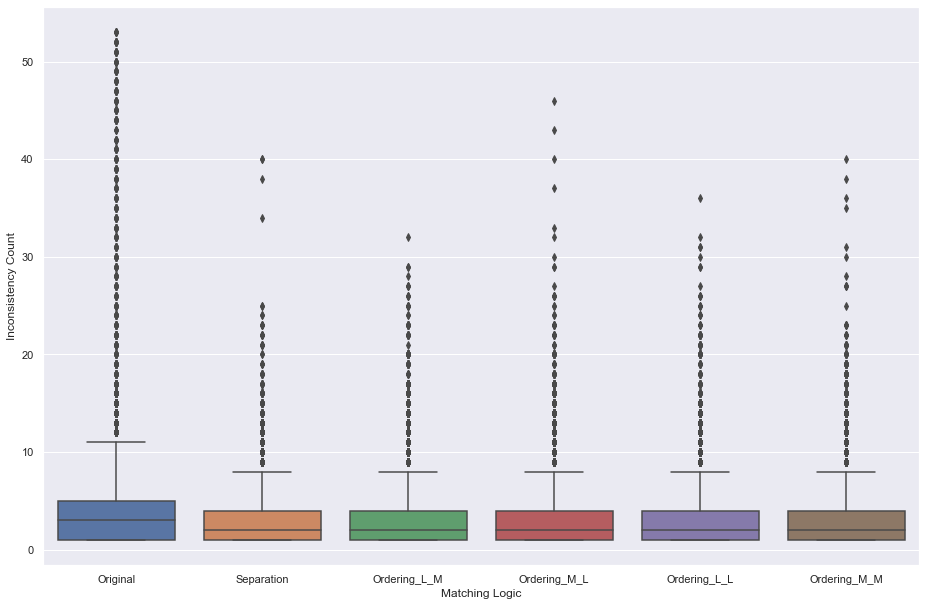

In [13]:
ax = sns.boxplot(x="Matching Logic", y="Inconsistency Count", data=create_dataframe(MATCHING_LOGIC_DATA,
                                                                                    CLUSTER_TRACE_NAMES,
                                                                                    "YH2_sub",
                                                                                    10_000
                                                                                   ))

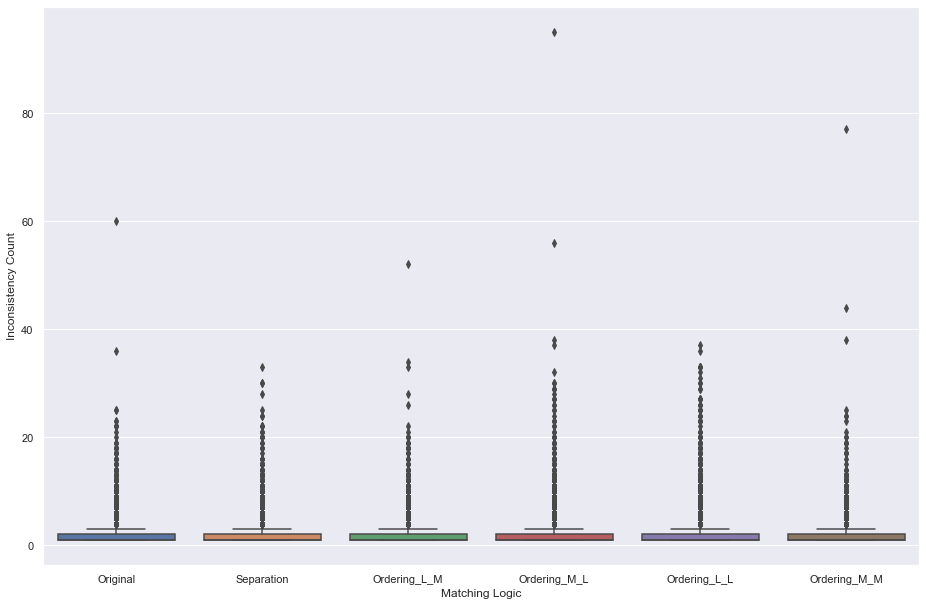

In [14]:
ax = sns.boxplot(x="Matching Logic", y="Inconsistency Count", data=create_dataframe(MATCHING_LOGIC_DATA,
                                                                                    CLUSTER_TRACE_NAMES,
                                                                                    "YH2_sub",
                                                                                    1000
                                                                                   ))

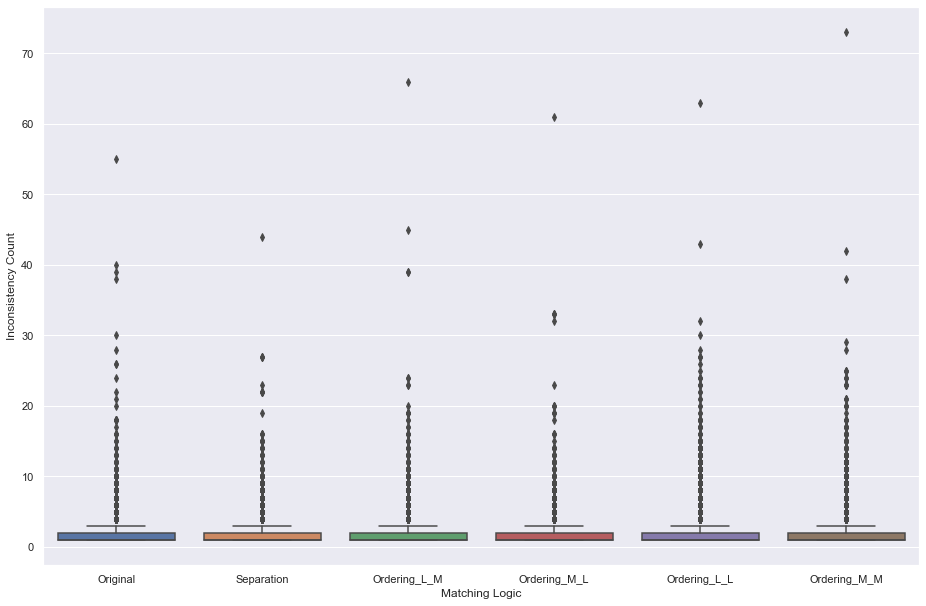

In [15]:
ax = sns.boxplot(x="Matching Logic", y="Inconsistency Count", data=create_dataframe(MATCHING_LOGIC_DATA,
                                                                                    CLUSTER_TRACE_NAMES,
                                                                                    "YH1_sub",
                                                                                    1000
                                                                                   ))

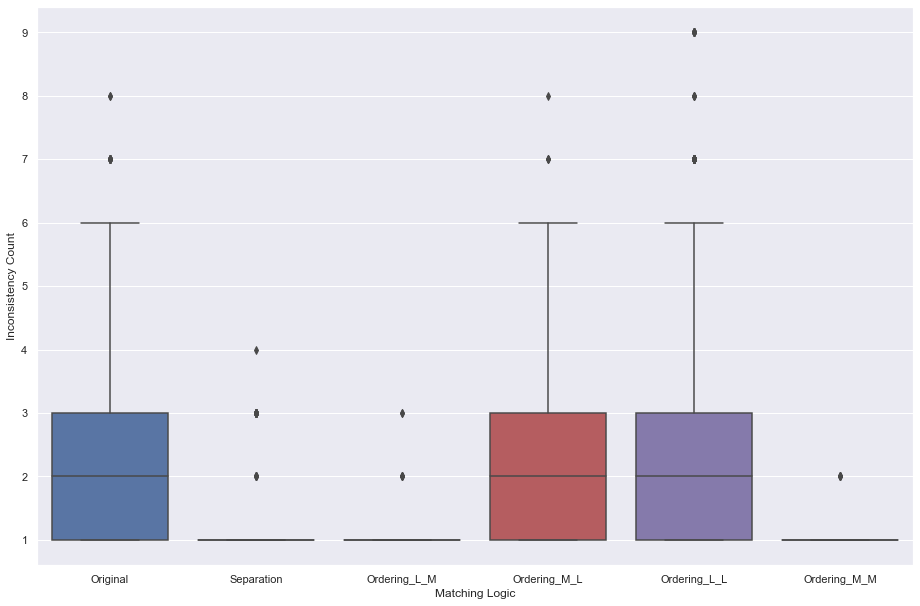

In [16]:
ax = sns.boxplot(x="Matching Logic", y="Inconsistency Count", data=create_dataframe(MATCHING_LOGIC_DATA,
                                                                                    CLUSTER_TRACE_NAMES,
                                                                                    "YH1_sub",
                                                                                    10_000
                                                                                   ))

---